In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate


In [2]:
delf=2
rf=range(60,92,delf)
ar=[]
for fr in rf:
    fname='Gain 5 elementos %i MHz (phi=0).csv'%fr
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1)
    dum=dum[np.isfinite(dum.gain)]
    ar+=[list(dum.gain)]
ar=np.array(ar)

In [3]:
rt=list(dum.theta)

In [4]:
x,y=np.meshgrid(rt,rf)

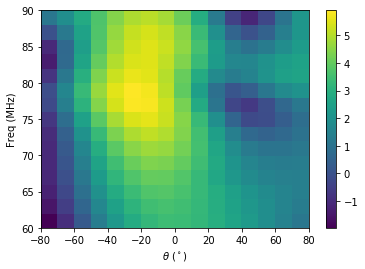

In [5]:
plt.pcolor(x,y,ar)
plt.colorbar()
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

In [6]:
deriv=np.gradient(ar,delf) 

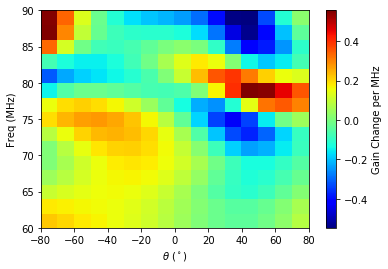

In [7]:
plt.pcolor(x,y,deriv[0],cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

In [18]:
delf=2
rf=range(60,92,delf)
ar90=[]
for fr in rf:
    fname='Gain 5 elementos %i MHz (phi=90).csv'%fr
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1)
    dum=dum[np.isfinite(dum.gain)]
    ar90+=[list(dum.gain)]
ar90=np.array(ar90)
rt90=list(dum.theta)

In [23]:
dum.head() # el intervalo es de 1 grado!

,theta,gain
1,-89,1.872106
2,-88,1.888861
3,-87,1.916574
4,-86,1.954934
5,-85,2.003518


In [21]:
x90.shape

(16, 179)

In [20]:
x90,y90=np.meshgrid(rt90,rf)

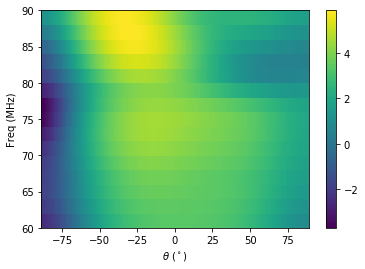

In [11]:
plt.pcolor(x90,y90,ar90)
plt.colorbar()
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

In [13]:
deriv90=np.gradient(ar90,delf) 

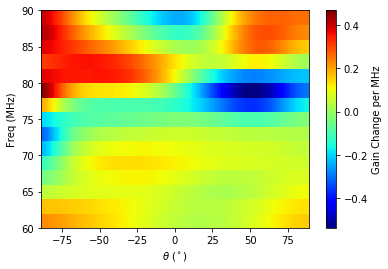

In [16]:
plt.pcolor(x90,y90,deriv90[0],cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

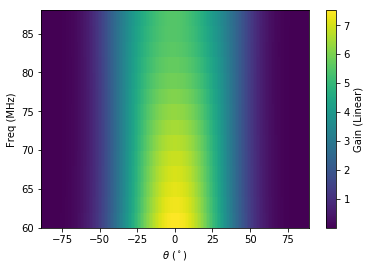

In [59]:
fold='c7'
ori=90 #deg
delf=2 # MHz
fmin=60 #MHz
fmax=90 #MHz
rf=range(fmin,fmax,delf)
ar=[]
for fr in rf:
    fname=fold+'/Gain %i MHz phi=%i.csv'%(fr,ori)
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1)
    dum=dum[np.isfinite(dum.gain)]
    ar+=[list(dum.gain)]
ar=np.array(ar)
rt=list(dum.theta)
x,y=np.meshgrid(rt,rf)
plt.pcolor(x,y,ar)
plt.colorbar(label='Gain (Linear)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Dipologainphi0')

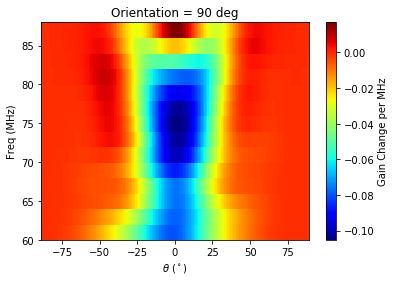

In [60]:
deriv=np.gradient(ar,delf) 
plt.pcolor(x,y,deriv[0],cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
plt.title('Orientation = '+str(ori)+" deg")

In [61]:
bvsp90=interpolate.RectBivariateSpline(rf,rt,ar,s=10)
dx290este, dy290este = 0.2, 0.2
xprueba = np.arange(0, 89, dx290este) # este
yprueba = np.arange(fmin, fmax, dy290este)
Xprueba, Yprueba = np.meshgrid(xprueba,yprueba)
Zprueba = bvsp90(yprueba, xprueba)
derivbspl90prueba=np.gradient(Zprueba,dx290este)

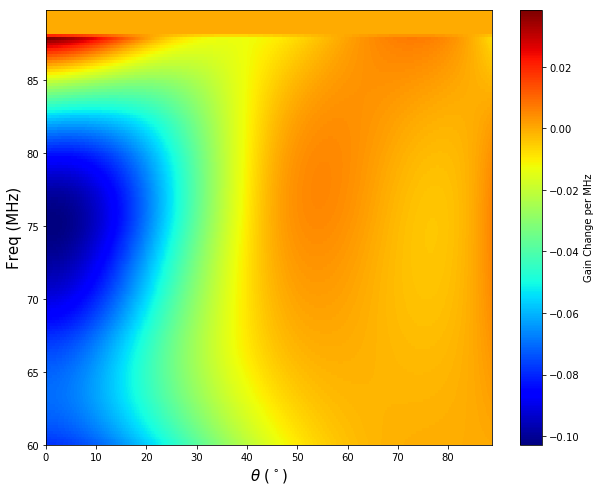

In [63]:
plt.figure(figsize=(10,8))
plt.pcolor(xprueba,yprueba,derivbspl90prueba[0],cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
#plt.xlim(0,89)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)',fontsize=15)
plt.xlabel(r'$\theta$ ($^\circ$)',fontsize=15)

In [64]:
derivbspl90prueba[0]

array([[-0.07782905, -0.07780764, -0.07778088, ...,  0.00037664,
         0.00040639,  0.00043703],
       [-0.07737641, -0.07735532, -0.07732884, ...,  0.00041666,
         0.00044852,  0.0004813 ],
       [-0.0764993 , -0.07647881, -0.07645288, ...,  0.0004968 ,
         0.00053291,  0.00057001],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])